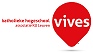<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
**SEARCH ALGORITHMS**<br>
Stefaan Haspeslagh & Andy Louwyck

---



---



#**SEARCH EXERCISER: BLIND SEARCH**

This notebook explains how to use `SearchExerciser` to apply blind search algorithms. 

##Cloning the GitHub repo

The `SearchExerciser` package is cloned from Github repository https://github.com/alouwyck/SearchExerciser:

In [1]:
import os, shutil

# remove directory 'SearchExerciser' if it already exists
path = "SearchExerciser"
if os.path.exists(path):
    shutil.rmtree(path)

# clone SearchExerciser repository
!git clone https://github.com/alouwyck/SearchExerciser

# move SearchExerciser package directory to current working directory
os.rename(path, 'temp')
shutil.copytree(os.path.join('temp', path), path);
shutil.rmtree('temp')

Cloning into 'SearchExerciser'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (234/234), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 234 (delta 137), reused 161 (delta 68), pack-reused 0
Receiving objects: 100% (234/234), 221.10 KiB | 22.11 MiB/s, done.
Resolving deltas: 100% (137/137), done.


## Importing the search algorithms

The following blind search algorithms are avaible with `SearchExerciser`:

- Depth-first search (DFS)
- Breadth-first search (BFS)
- Non-deterministic search (NDS)
- Iterative deepening search (IDS)

The algorithms are implemented in module `search.blind`:

In [2]:
from SearchExerciser.search.blind import DFS, BFS, NDS, IDS

`DFS`, `BFS`, `NDS`, and `IDS` are classes.

##Solving a maze problem

###Creating the maze

Recall that we need to import class `Maze` from module `maze` to create a maze:

In [3]:
from SearchExerciser.maze import Maze

The maze grid is defined by passing a list of strings to static method `Maze.create`. The following characters are used to indicate different grid cells:
- start: `'*'`
- goal: `'o'`
- wall: `'#'`
- free: `'.'`

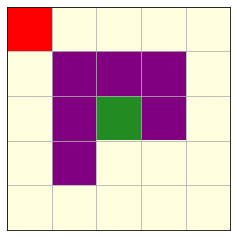

In [4]:
maze = Maze.create(['o....',
                    '.###.',
                    '.#*#.',
                    '.#...',
                    '.....'])
maze.plot()

###Depth-first search

To apply depth-first search (DFS), we call method `search` and pass class `DFS` to it:

In [5]:
path = maze.search(DFS, print_queue=True)

Initial queue:
o....  
.###.  
.#x#.  
.#...  
.....  

Iteration 1
Path removed from queue:
o....
.###.
.#x#.
.#...
.....
New paths:
o....  
.###.  
.#x#.  
.#x..  
.....  
Paths in queue:
o....  
.###.  
.#x#.  
.#x..  
.....  

Iteration 2
Path removed from queue:
o....
.###.
.#x#.
.#x..
.....
New paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#xx.  .#x..  
.....  ..x..  
Paths in queue:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#xx.  .#x..  
.....  ..x..  

Iteration 3
Path removed from queue:
o....
.###.
.#x#.
.#xx.
.....
New paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#xxx  .#xx.  
.....  ...x.  
Paths in queue:
o....  o....  o....  
.###.  .###.  .###.  
.#x#.  .#x#.  .#x#.  
.#xxx  .#xx.  .#x..  
.....  ...x.  ..x..  

Iteration 4
Path removed from queue:
o....
.###.
.#x#.
.#xxx
.....
New paths:
o....  o....  
.###.  .###.  
.#x#x  .#x#.  
.#xxx  .#xxx  
.....  ....x  
Paths in queue:
o....  o....  o....  o....  
.###.  .###.  .###.  .###.  
.#x#x  .#x#.  .#x

We clearly see that DFS applies the LIFO method: the new paths that are last added to the queue are removed first. 

Let's plot the found path to the goal:

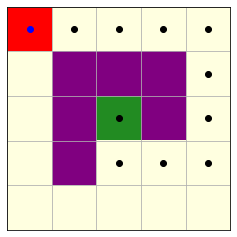

In [6]:
path.plot()

The convention is to select cells in the following order: left, right, up, and down. This explains why the path on the right-hand side is chosen by DFS. It is possible to change the order of the production rules. Suppose we want the cells to be selected in the following order: down, up, right, left. To do this, we need to import classes `Down`, `Up`, `Right`, and `Left`, instantiate them and assign them in the desired order as list to attribute `rules`:

In [8]:
from SearchExerciser.maze import Down, Up, Right, Left

maze.rules = [Down(), Up(), Right(), Left()] 

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.0029222965240478516 seconds
Number of iterations: 13
Maximum length of queue: 5


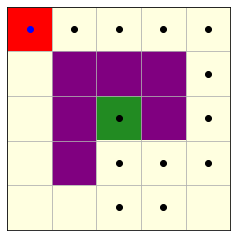

In [9]:
maze.search(DFS).plot()

Again, DFS chooses the path on the right-hand side, but this time, it first goes down as far as possible. To let DFS choose the path on the left-hand side, we could, for instance, define the following order:

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.001211404800415039 seconds
Number of iterations: 8
Maximum length of queue: 3


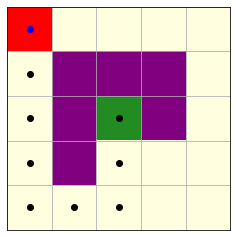

In [13]:
maze.rules = [Down(), Left(), Up(), Right()]
maze.search(DFS).plot()

###Breadth-first search

Because breadth-first search (BFS) applies the FIFO method, it always finds the shortest path. Let's check this out:

ALGORITHM: Breadth-first search
RESULT: SUCCES
Elapsed time: 0.007689952850341797 seconds
Number of iterations: 36
Maximum length of queue: 9


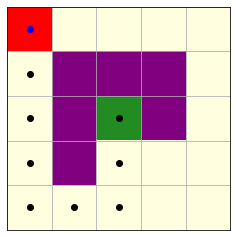

In [15]:
maze.rules = [Left(), Right(), Up(), Down()]
maze.search(BFS).plot()

Note that we set the rules to the default left, right, up, and down. In this case, we need 36 iterations to find the shortest path. By re-ordering the production rules, this number can be reduced:

ALGORITHM: Breadth-first search
RESULT: SUCCES
Elapsed time: 0.00934600830078125 seconds
Number of iterations: 32
Maximum length of queue: 9


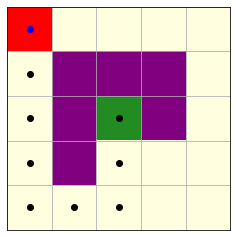

In [20]:
maze.rules = [Up(), Left(), Down(), Right()]
maze.search(BFS).plot()

###Non-deterministic search

The non-deterministic search (NDS) algorithm selects nodes randomly. It is implemented in class `NDS`, which uses module `random`. This means we can use function `random.seed` to avoid the randomness and get the same result each time we run the algorithm: 

Initial queue:
o....  
.###.  
.#x#.  
.#...  
.....  

Iteration 1
Path removed from queue:
o....
.###.
.#x#.
.#...
.....
New paths:
o....  
.###.  
.#x#.  
.#x..  
.....  
Paths in queue:
o....  
.###.  
.#x#.  
.#x..  
.....  

Iteration 2
Path removed from queue:
o....
.###.
.#x#.
.#x..
.....
New paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#xx.  .#x..  
.....  ..x..  
Paths in queue:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#x..  .#xx.  
..x..  .....  

Iteration 3
Path removed from queue:
o....
.###.
.#x#.
.#x..
..x..
New paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#x..  .#x..  
.xx..  ..xx.  
Paths in queue:
o....  o....  o....  
.###.  .###.  .###.  
.#x#.  .#x#.  .#x#.  
.#x..  .#xx.  .#x..  
..xx.  .....  .xx..  

Iteration 4
Path removed from queue:
o....
.###.
.#x#.
.#x..
..xx.
New paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#x..  .#xx.  
..xxx  ..xx.  
Paths in queue:
o....  o....  o....  o....  
.###.  .###.  .###.  .###.  
.#x#.  .#x#.  .#x

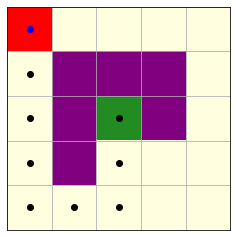

In [42]:
from random import seed
seed(2)
maze.rules = [Left(), Right(), Up(), Down()]
maze.search(NDS, print_queue=True).plot()

We see that this implementation of the non-deterministic search algorithm adds new paths randomly to the queue.

###Iterative deepening search

The final blind search algorithm available with `SearchExerciser` is iterative deepening search (IDS), which iteratively applies depth-limited depth-first search while increasing the depth limit:

--> DEPTH: 1
ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.00039124488830566406 seconds
Number of iterations: 1
Maximum length of queue: 1

--> DEPTH: 2
ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.0005218982696533203 seconds
Number of iterations: 2
Maximum length of queue: 1

--> DEPTH: 3
ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.00064849853515625 seconds
Number of iterations: 4
Maximum length of queue: 2

--> DEPTH: 4
ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.01002192497253418 seconds
Number of iterations: 8
Maximum length of queue: 3

--> DEPTH: 5
ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.001051187515258789 seconds
Number of iterations: 15
Maximum length of queue: 4

--> DEPTH: 6
ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.0016942024230957031 seconds
Number of iterations: 22
Maximum length of queue: 4

--> DEPTH: 7
ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time:

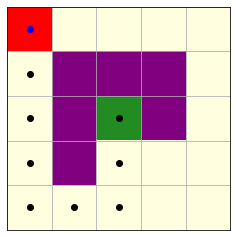

In [44]:
maze.search(IDS).plot()

IDS finds the shortest path, but for this small problem, there is no computational gain, as we need 152 iterations. For most large problems, however, IDS will be a better choice than BFS!

## Solving a graph problem

###Creating the graph

Recall that we need to import class `Graph` from module `graph` to create a graph:

In [45]:
from SearchExerciser.graph import Graph

Blind search algorithms do not take into account costs, nor do they use a heuristic function. So we only need to define the edges:

In [46]:
graph = Graph.create(edges=[("S", "A"), ("S", "D"), ("A", "D"), ("A", "B"), ("D", "E"), 
                            ("B", "E"), ("B", "C"), ("E", "F"), ("F", "G")])

We define the node coordinates and visualize the graph calling method `plot`:

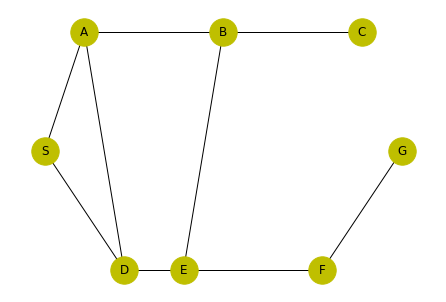

In [48]:
coordinates = dict(S=[0, 0.5], 
                   A=[1, 1],
                   D=[2, 0],
                   E=[3.5, 0],
                   B=[4.5, 1],
                   F=[7, 0],
                   C=[8, 1],
                   G=[9, 0.5])
graph.plot(coordinates)

###Depth-first search

Let's apply DFS to find a path from start S to gaol G:

In [49]:
path = graph.search(DFS, print_queue=True)

Initial queue:
[S]

Iteration 1
Path removed from queue:
S
New paths:
[SA,SD]
Paths in queue:
[SA,SD]

Iteration 2
Path removed from queue:
SA
New paths:
[SAB,SAD]
Paths in queue:
[SAB,SAD,SD]

Iteration 3
Path removed from queue:
SAB
New paths:
[SABC,SABE]
Paths in queue:
[SABC,SABE,SAD,SD]

Iteration 4
Path removed from queue:
SABC
New paths:
[]
Paths in queue:
[SABE,SAD,SD]

Iteration 5
Path removed from queue:
SABE
New paths:
[SABED,SABEF]
Paths in queue:
[SABED,SABEF,SAD,SD]

Iteration 6
Path removed from queue:
SABED
New paths:
[]
Paths in queue:
[SABEF,SAD,SD]

Iteration 7
Path removed from queue:
SABEF
New paths:
[SABEFG]
Paths in queue:
[SABEFG,SAD,SD]

Path to goal found in new paths:
SABEFG

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.01034998893737793 seconds
Number of iterations: 7
Maximum length of queue: 4


We see that new nodes are selected in ascending alphabetical order. We can check this by getting attribute `rules`:

In [50]:
graph.rules

[A, B, C, D, E, F, G, S]

The list shows us the priority order of the nodes. 

Suppose now we want the nodes to be selected in descending alphabetical order. To do this, we can simply sort the list, or we may use static method `create_all` of class `ProductionRule`, which uses function `sorted`, and therefore accepts the same optional input arguments `reverse` and `key`:

In [52]:
from SearchExerciser.graph import ProductionRule
graph.rules = ProductionRule.create_all(graph, reverse=True)
graph.rules

[S, G, F, E, D, C, B, A]

Now DFS finds the shortest path:

In [53]:
print("Path found:", graph.search(DFS, print_result=False))

Path found: SDEFG


###Breadth-first search

We know that BFS also finds the shortest path:

In [58]:
graph.rules = ProductionRule.create_all(graph)  # reset rules to nodes sorted in ascending alphabetical order
graph.search(BFS, print_queue=True);

Initial queue:
[S]

Iteration 1
Path removed from queue:
S
New paths:
[SA,SD]
Paths in queue:
[SA,SD]

Iteration 2
Path removed from queue:
SA
New paths:
[SAB,SAD]
Paths in queue:
[SD,SAB,SAD]

Iteration 3
Path removed from queue:
SD
New paths:
[SDA,SDE]
Paths in queue:
[SAB,SAD,SDA,SDE]

Iteration 4
Path removed from queue:
SAB
New paths:
[SABC,SABE]
Paths in queue:
[SAD,SDA,SDE,SABC,SABE]

Iteration 5
Path removed from queue:
SAD
New paths:
[SADE]
Paths in queue:
[SDA,SDE,SABC,SABE,SADE]

Iteration 6
Path removed from queue:
SDA
New paths:
[SDAB]
Paths in queue:
[SDE,SABC,SABE,SADE,SDAB]

Iteration 7
Path removed from queue:
SDE
New paths:
[SDEB,SDEF]
Paths in queue:
[SABC,SABE,SADE,SDAB,SDEB,SDEF]

Iteration 8
Path removed from queue:
SABC
New paths:
[]
Paths in queue:
[SABE,SADE,SDAB,SDEB,SDEF]

Iteration 9
Path removed from queue:
SABE
New paths:
[SABED,SABEF]
Paths in queue:
[SADE,SDAB,SDEB,SDEF,SABED,SABEF]

Iteration 10
Path removed from queue:
SADE
New paths:
[SADEB,SADEF]
Pat

### Non-deterministic search

Because the non-deterministic search algorithm randomly selects new nodes, we cannot predict which path it will find:

In [61]:
from random import seed
seed(20)
print("Path found:", graph.search(NDS, print_result=False))

Path found: SABEFG


### Iterative deepening search

As the shortest path consists of 5 nodes, there are 5 outer iterations needed for iterative deepening to find this path:

In [63]:
print("Path found:", graph.search(IDS))

--> DEPTH: 1
ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.0005562305450439453 seconds
Number of iterations: 1
Maximum length of queue: 1

--> DEPTH: 2
ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.000698089599609375 seconds
Number of iterations: 3
Maximum length of queue: 2

--> DEPTH: 3
ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.0010874271392822266 seconds
Number of iterations: 7
Maximum length of queue: 3

--> DEPTH: 4
ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.0010535717010498047 seconds
Number of iterations: 13
Maximum length of queue: 4

--> DEPTH: 5
ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.0016319751739501953 seconds
Number of iterations: 21
Maximum length of queue: 4

--> FINAL RESULT
ALGORITHM: Iterative deepening search
RESULT: SUCCES
Elapsed time: 0.01776909828186035 seconds
Number of iterations: 45
Maximum length of queue: 4
Path found: SDEFG
